In [1]:
from tools import *
from differential import *
from pprint import pprint

MAKE SURE EVERYTHING IS IN CGS


In [2]:
sim_path = "/Users/reza/Career/DMLab/SURROGATE/sun-sim/src/sfno/mhd/vr_rho_pinn/cr1833-all-components/kpo_mas_mas_std_0101"
system = "cgs"
mas, coefficients, theta, phi = get_sim(sim_path, system=system)
r = mas['r']
print(type(r), "dtype of r")

rho shape after interpolation and transpose:  (140, 110, 128)
vr shape after interpolation and transpose:  (140, 110, 128)
vt shape after interpolation and transpose:  (140, 110, 128)
vp shape after interpolation and transpose:  (140, 110, 128)
br shape after interpolation and transpose:  (140, 110, 128)
bt shape after interpolation and transpose:  (140, 110, 128)
bp shape after interpolation and transpose:  (140, 110, 128)
p shape after interpolation and transpose:  (140, 110, 128)
<class 'torch.Tensor'> dtype of r


In [3]:
pprint(coefficients)
print(system, "system\n", "Nr:", r.shape, "Nt:", theta.shape, "Np:", phi.shape)

{'G': 6.6743e-08,
 'M': 1.9884999999999998e+33,
 'c': 29979245800.0,
 'nu': 1.675171314428855e+16,
 'omega_rot': 2.84e-06}
cgs system
 Nr: torch.Size([140]) Nt: torch.Size([110]) Np: torch.Size([128])


In [4]:
result = mas_momentum_residual_conservative(
    mas["rho"],
    mas["vr"],
    mas["vt"],
    mas["vp"],
    mas["br"],
    mas["bt"],
    mas["bp"],
    mas["p"],
    r,
    theta,
    dr=r[1] - r[0],
    dtheta=theta[1] - theta[0],
    dphi=phi[1] - phi[0],
    G=coefficients["G"],
    M=coefficients["M"],
    # nu=coefficients["nu"],
)

In [5]:
mask = build_analysis_mask(result["residual"][0], n_exclude_theta=2)

In [6]:
metrics = detailed_residual_metrics(
    result["lhs"],
    result["rhs"],
    result["residual"],
    mask=None
)

print(metrics)

{'RMS_LHS': 8.127513975013675e-14, 'RMS_RHS': 3.4052838147545416e-21, 'RMS_RES': 8.127513974929381e-14, 'RMS_RES/LHS': 0.9999999999896285, 'RMS_RES/RHS': 23867361.47315371, 'rel_p50': 0.9744117526074956, 'rel_p90': 0.9999482947384384, 'rel_p95': 0.9999931845302668, 'rel_p99': 0.9999999853551336, 'rel_max': 0.9999999998371278}


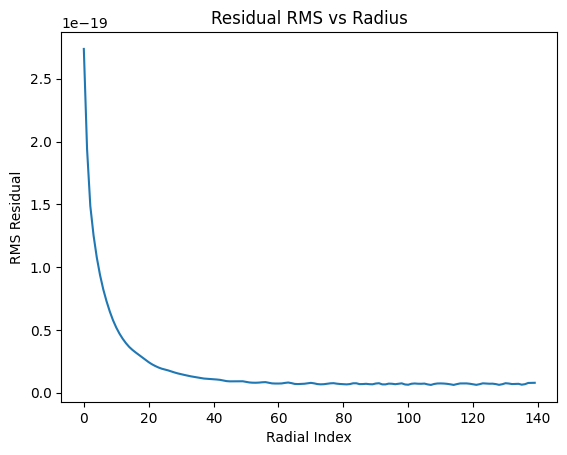

100%|██████████| 140/140 [00:07<00:00, 17.87it/s]


Saved: residual.gif


100%|██████████| 140/140 [00:26<00:00,  5.26it/s]


Saved: lhs_rhs.gif


In [7]:
radial_profile = radial_rms_profile(result["residual"], mask)
plot_radial_profile(radial_profile)

make_residual_gif(
    "residual.gif",
    *result["residual"],
    mask
)

make_lhs_rhs_residual_gif(
    "lhs_rhs.gif",
    result["lhs"],
    result["rhs"],
    result["residual"],
    mask
)